# Mean Heading, all in Java

First, set the classpath with the right jar. This `jar` contains the statistical functions, system resolution and other linear algebra features, as well as the graphic library we use to display the curves.

This jar is built from the root of this repository, using the following command:
```
$ ./gradlew shadowJar --parallel
```

## What we do here
We want to show how to get to the mean of data like headind (or any kind of direction)
- If the data vary from 80 to 100 (in degrees)
    - The mean value would be around 90, which is **good**
- If the data vary from 170 to 190 (in degrees)
    - The mean value would be around 180, which is **good**
- If the data vary from 260 to 280 (in degrees)
    - The mean value would be around 270, which is **good**
- If the data vary from 350 to 010 (in degrees)
    - The mean value would be around 180, which is **_BAAAAD!_**
    

In [1]:
%classpath add jar "../build/libs/Algebra-1.0-all.jar"

In [2]:
// Verify if the classpath above is taken in account
import matrix.SquareMatrix;
import matrix.SystemUtil;
import smoothing.LeastSquaresMethod;
import stat.StatFunctions;

import gsg.SwingUtils.WhiteBoardPanel;
import gsg.VectorUtils;

import java.util.concurrent.atomic.AtomicInteger;
import java.awt.Color;
import java.awt.Dimension;
import java.awt.Font;
import java.awt.BasicStroke;
import java.awt.Point;

Where we are:

In [3]:
System.out.println(String.format("Running from folder %s", System.getProperty("user.dir")));
System.out.println(String.format("Java version %s", System.getProperty("java.version")));

Running from folder /Users/olivierlediouris/repos/raspberry-coffee/Algebra/jupyter
Java version 11.0.8


Now create a white board, with several non-default options

In [4]:
WhiteBoardPanel whiteBoard = new WhiteBoardPanel();
whiteBoard.setAxisColor(new Color(125, 0, 255, 255));
whiteBoard.setWithGrid(false);
whiteBoard.setBgColor(new Color(250, 250, 250, 255));
whiteBoard.setGraphicTitle(null);
whiteBoard.setSize(new Dimension(800, 600));
whiteBoard.setTextColor(Color.RED);
whiteBoard.setTitleFont(new Font("Arial", Font.BOLD | Font.ITALIC, 32));
whiteBoard.setGraphicMargins(30);
whiteBoard.setXEqualsY(true);
// Enforce Y amplitude
whiteBoard.setForcedMinY(0d);
whiteBoard.setForcedMaxY(360d);

### Create random data
They are created as `double arrays`, and will be eventually transformed into a `List<VectorUtils.Vector2D>`, to be easilly managed by the white board. This could be done all in one step, we proceed like this for clarity.

#### Dealing with 90 &plusmn; 10

In [5]:
List<Double> data90 = new ArrayList<>();
for (double x=0; x<500; x++) {
  double rndValue = 90 + (20 * (Math.random() - 0.5)); 
  data90.add(rndValue);
}
// data90.forEach(System.out::println);
double total90 = data90.stream().mapToDouble(Double::doubleValue).sum();
double mean90 = total90 / data90.size();
System.out.printf("Mean: %f\n", mean90);


Mean: 89.573799


java.io.PrintStream@179dbc70

In [6]:
whiteBoard.setGraphicTitle(String.format("Mean is %.02f\272", mean90));

List<VectorUtils.Vector2D> dataVectors = new ArrayList<>();
for (int i=0; i<data90.size(); i++) {
  dataVectors.add(new VectorUtils.Vector2D(i, data90.get(i)));
}
// Mean serie
List<VectorUtils.Vector2D> meanVectors = Arrays.asList(
    new VectorUtils.Vector2D(0, mean90),
    new VectorUtils.Vector2D(data90.size() - 1, mean90)
);

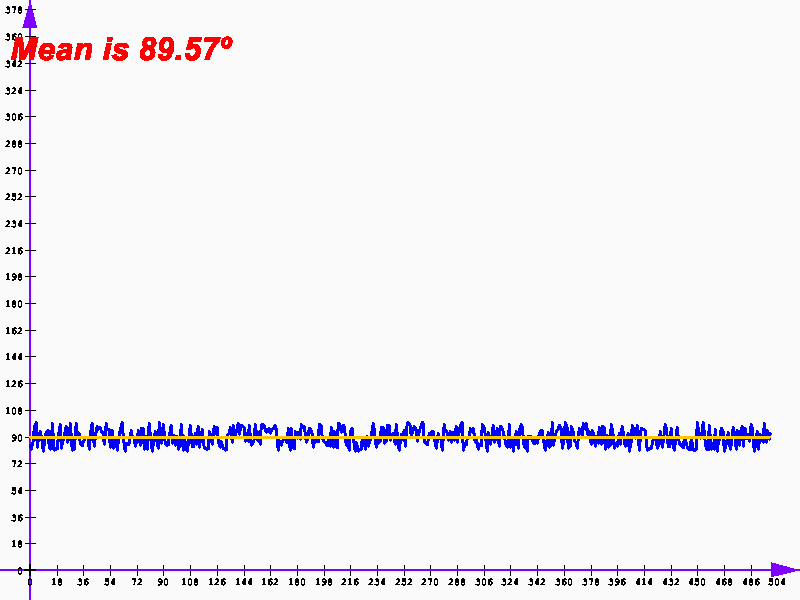

In [7]:
WhiteBoardPanel.DataSerie dataSerie = new WhiteBoardPanel.DataSerie()
                            .data(dataVectors)
                            .graphicType(WhiteBoardPanel.GraphicType.LINE)
                            .lineThickness(3)
                            .color(Color.BLUE);
whiteBoard.addSerie(dataSerie);

WhiteBoardPanel.DataSerie meanSerie = new WhiteBoardPanel.DataSerie()
                            .data(meanVectors)
                            .graphicType(WhiteBoardPanel.GraphicType.LINE)
                            .lineThickness(3)
                            .color(Color.ORANGE);
whiteBoard.addSerie(meanSerie);

whiteBoard.getImage();

#### Dealing with 180 &plusmn; 10

In [8]:
List<Double> data180 = new ArrayList<>();
for (double x=0; x<500; x++) {
  double rndValue = 180 + (20 * (Math.random() - 0.5)); 
  data180.add(rndValue);
}
// data180.forEach(System.out::println);
double total180 = data180.stream().mapToDouble(Double::doubleValue).sum();
double mean180 = total180 / data180.size();
System.out.printf("Mean: %f\n", mean180);


Mean: 179.756642


java.io.PrintStream@179dbc70

In [9]:
whiteBoard.setGraphicTitle(String.format("Mean is %.02f\272", mean180));

dataVectors = new ArrayList<>();
for (int i=0; i<data180.size(); i++) {
  dataVectors.add(new VectorUtils.Vector2D(i, data180.get(i)));
}
// Mean serie
meanVectors = Arrays.asList(
    new VectorUtils.Vector2D(0, mean180),
    new VectorUtils.Vector2D(data180.size() - 1, mean180)
);

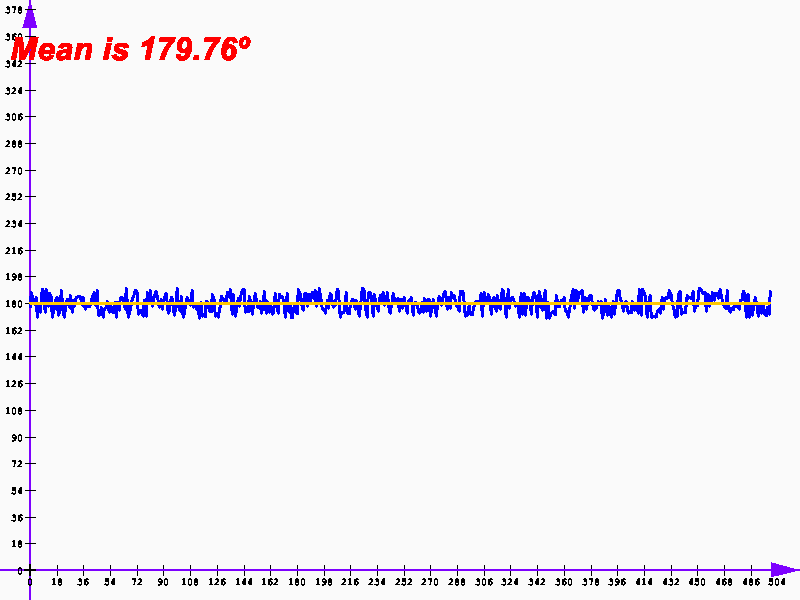

In [10]:
whiteBoard.resetAllData();
WhiteBoardPanel.DataSerie dataSerie = new WhiteBoardPanel.DataSerie()
                            .data(dataVectors)
                            .graphicType(WhiteBoardPanel.GraphicType.LINE)
                            .lineThickness(3)
                            .color(Color.BLUE);
whiteBoard.addSerie(dataSerie);

WhiteBoardPanel.DataSerie meanSerie = new WhiteBoardPanel.DataSerie()
                            .data(meanVectors)
                            .graphicType(WhiteBoardPanel.GraphicType.LINE)
                            .lineThickness(3)
                            .color(Color.ORANGE);
whiteBoard.addSerie(meanSerie);

whiteBoard.getImage();

#### Dealing with 270 &plusmn; 10

In [11]:
List<Double> data270 = new ArrayList<>();
for (double x=0; x<500; x++) {
  double rndValue = 270 + (20 * (Math.random() - 0.5)); 
  data270.add(rndValue);
}
// data270.forEach(System.out::println);
double total270 = data270.stream().mapToDouble(Double::doubleValue).sum();
double mean270 = total270 / data270.size();
System.out.printf("Mean: %f\n", mean270);


Mean: 269.720461


java.io.PrintStream@179dbc70

In [12]:
whiteBoard.setGraphicTitle(String.format("Mean is %.02f\272", mean270));

dataVectors = new ArrayList<>();
for (int i=0; i<data270.size(); i++) {
  dataVectors.add(new VectorUtils.Vector2D(i, data270.get(i)));
}
// Mean serie
meanVectors = Arrays.asList(
    new VectorUtils.Vector2D(0, mean270),
    new VectorUtils.Vector2D(data270.size() - 1, mean270)
);

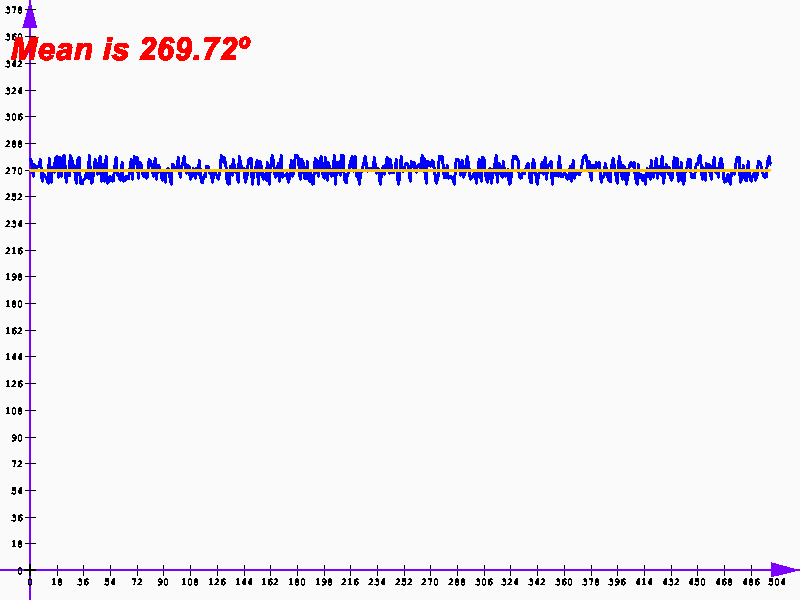

In [13]:
whiteBoard.resetAllData();
WhiteBoardPanel.DataSerie dataSerie = new WhiteBoardPanel.DataSerie()
                            .data(dataVectors)
                            .graphicType(WhiteBoardPanel.GraphicType.LINE)
                            .lineThickness(3)
                            .color(Color.BLUE);
whiteBoard.addSerie(dataSerie);

WhiteBoardPanel.DataSerie meanSerie = new WhiteBoardPanel.DataSerie()
                            .data(meanVectors)
                            .graphicType(WhiteBoardPanel.GraphicType.LINE)
                            .lineThickness(3)
                            .color(Color.ORANGE);
whiteBoard.addSerie(meanSerie);

whiteBoard.getImage();

#### Dealing with 360 &plusmn; 10

In [14]:
List<Double> data360 = new ArrayList<>();
for (double x=0; x<500; x++) {
  double rndValue = 360 + (20 * (Math.random() - 0.5)); 
  // System.out.println("Value " + (rndValue % 360));
  data360.add(rndValue % 360);
}

// data360.forEach(System.out::println);

double min360 = data360.stream().filter(d -> d > 180d).mapToDouble(d -> d).min().orElseThrow(NoSuchElementException::new);
// double max360 = Collections.max(data360);
double max360 = data360.stream().filter(d -> d < 180d).mapToDouble(d -> d).max().orElseThrow(NoSuchElementException::new);
double total360 = data360.stream().mapToDouble(Double::doubleValue).sum();
double mean360 = total360 / data360.size();
System.out.printf("Mean for [%f, %f] = %f, bad value!!!\n", min360, max360, mean360);


Mean for [350.046667, 9.915144] = 170.276364, bad value!!!


java.io.PrintStream@179dbc70

In [15]:
whiteBoard.setGraphicTitle(String.format("Mean is %.02f\272 ???", mean360));

dataVectors = new ArrayList<>();
for (int i=0; i<data360.size(); i++) {
  dataVectors.add(new VectorUtils.Vector2D(i, data360.get(i)));
}
// Mean serie
meanVectors = Arrays.asList(
    new VectorUtils.Vector2D(0, mean360),
    new VectorUtils.Vector2D(data360.size() - 1, mean360)
);

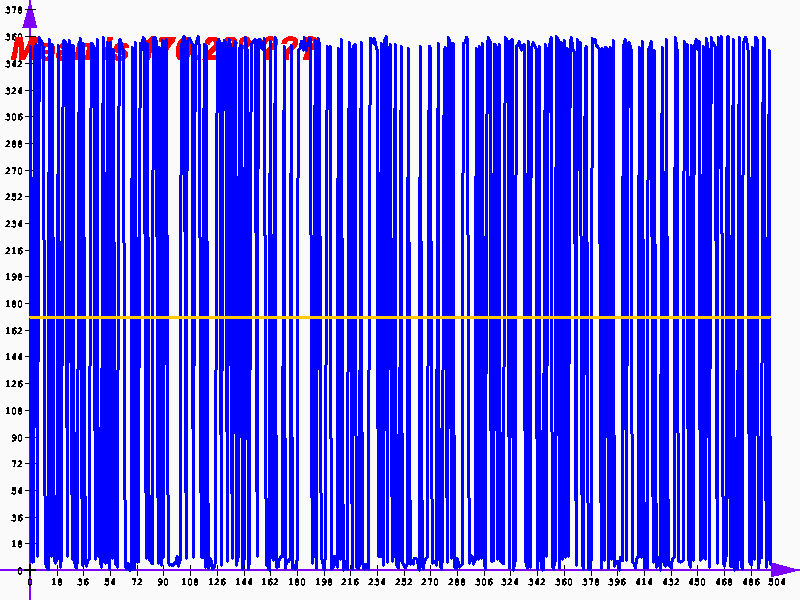

In [16]:
whiteBoard.resetAllData();
WhiteBoardPanel.DataSerie dataSerie = new WhiteBoardPanel.DataSerie()
                            .data(dataVectors)
                            .graphicType(WhiteBoardPanel.GraphicType.LINE)
                            .lineThickness(3)
                            .color(Color.BLUE);
whiteBoard.addSerie(dataSerie);

WhiteBoardPanel.DataSerie meanSerie = new WhiteBoardPanel.DataSerie()
                            .data(meanVectors)
                            .graphicType(WhiteBoardPanel.GraphicType.LINE)
                            .lineThickness(3)
                            .color(Color.ORANGE);
whiteBoard.addSerie(meanSerie);

whiteBoard.getImage();

## Displayed another way
_Not_ the cartesian way, but the polar way. 

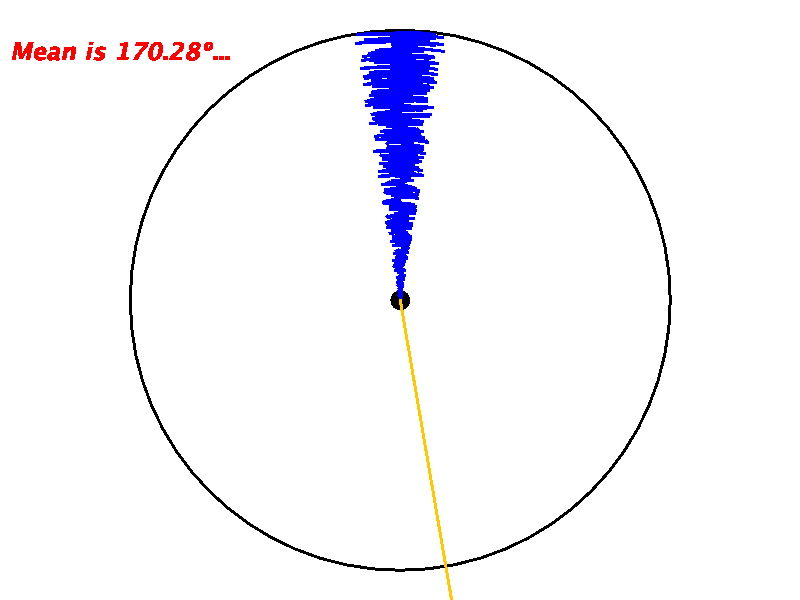

In [17]:
Dimension wbDim = whiteBoard.getSize();
whiteBoard.setWhiteBoardWriter(g2d -> {
    g2d.setColor(Color.WHITE);
    g2d.fillRect(0, 0, wbDim.width, wbDim.height);
    g2d.setColor(Color.BLACK);
    g2d.setStroke(new BasicStroke(3));
    int xCenter = wbDim.width / 2;
    int yCenter = wbDim.height / 2;
    int radius = (int)Math.round(Math.min(xCenter, yCenter) * 0.9);
    int KNOB_RADIUS = 10;
    g2d.fillOval(xCenter - KNOB_RADIUS, yCenter - KNOB_RADIUS, 2 * KNOB_RADIUS, 2 * KNOB_RADIUS);
    g2d.drawOval(xCenter - radius, yCenter - radius, 2 * radius, 2 * radius);
    g2d.setColor(Color.BLUE);
    Point previous = null;
    for (int i=0; i<data360.size(); i++) {
        int thisPointRadius = (int)Math.round(radius * (double)i/(double)data360.size());
        int x = xCenter + (int)Math.round(thisPointRadius * Math.sin(Math.toRadians(data360.get(i))));
        int y = yCenter - (int)Math.round(thisPointRadius * Math.cos(Math.toRadians(data360.get(i))));
        Point thisPoint = new Point(x, y);
        if (previous != null) {
            g2d.drawLine(previous.x, previous.y, thisPoint.x, thisPoint.y);
        }
        previous = thisPoint;
    }
    g2d.setColor(Color.ORANGE);
    
    int meanPointRadius = (int)Math.round(radius * data360.size());
    int meanX = xCenter + (int)Math.round(meanPointRadius * Math.sin(Math.toRadians(mean360)));
    int meanY = yCenter - (int)Math.round(meanPointRadius * Math.cos(Math.toRadians(mean360)));
    g2d.drawLine(xCenter, yCenter, meanX, meanY);
    
    String title = String.format("Mean is %.02f\272...", mean360);
    g2d.setColor(Color.RED);
    g2d.setFont(g2d.getFont().deriveFont(Font.BOLD | Font.ITALIC).deriveFont(24f));
    g2d.drawString(title, 10, 60);
});


whiteBoard.getImage();

#### Let's fix this
Take the _mean of the **sine and cosine** values_, and put it back in position with arcTan2

In [18]:
double totalSin360 = data360.stream().mapToDouble(angle -> Math.sin(Math.toRadians(angle))).sum();
double totalCos360 = data360.stream().mapToDouble(angle -> Math.cos(Math.toRadians(angle))).sum();

double finalSin = totalSin360 / data360.size();
double finalCos = totalCos360 / data360.size();

In [19]:
double angle = Math.toDegrees(Math.atan2(finalSin, finalCos));
while (angle < 0) {
  angle += 360;
}
mean360 = angle % 360;
System.out.printf("Mean: %.03f \272\n", mean360);

Mean: 0.357 º


java.io.PrintStream@179dbc70

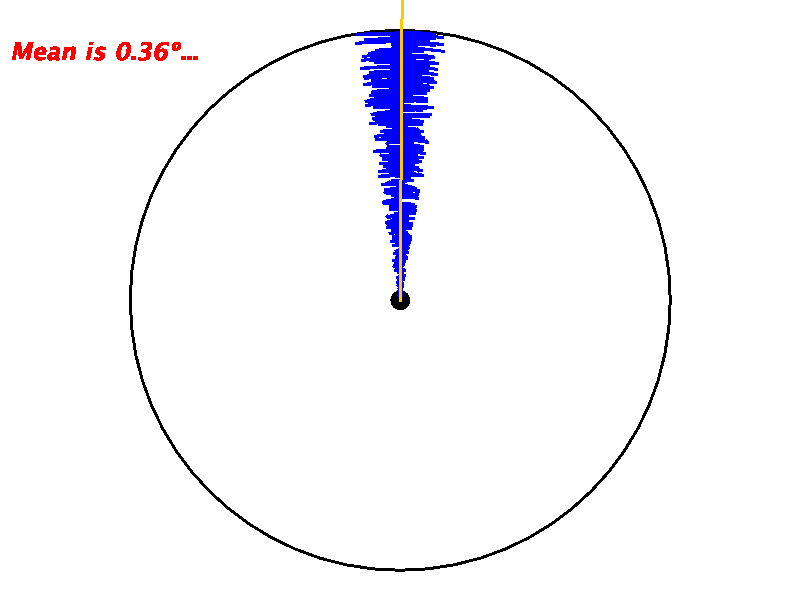

In [20]:
whiteBoard.getImage();

Much better, done!